In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.precision", 2)

# Posts

In [2]:
post_col_names = ["title", "author", "created_utc", "score", "domain", "selftext", "id", "upvote_ratio", "num_comments"]
posts = pd.read_csv("reddit_data/conservative_posts.csv", names=post_col_names)
posts.head()

,title,author,created_utc,score,domain,selftext,id,upvote_ratio,num_comments
0,China is paying reddit to take down pictures o...,ManualRockBot,1.59e+09,47736,i.redd.it,'',ftaazt,0.77,1317
1,Terry Crews articulates everything wrong with ...,Wonder10x,1.59e+09,29142,i.redd.it,'',hlo9os,0.71,1643
2,Trump calls for delay to 2020 US election,NoleFan723,1.60e+09,21337,bbc.com,'',i0ltok,0.73,6125
3,Never Forget,tehForce,1.60e+09,20050,i.redd.it,'',iqncit,0.65,2073
4,So let me get this straight...,Clatsop,1.48e+09,19572,i.imgur.com,'',5iugd6,0.52,3184


In [3]:
print(posts.shape)

(997, 9)


In [4]:
# posts.info()

In [5]:
posts.describe()

,created_utc,score,upvote_ratio,num_comments
count,9.97e+02,997.00,997.00,997.00
mean,1.58e+09,4821.06,0.76,554.46
std,2.28e+07,2659.99,0.10,605.28
min,1.43e+09,3146.00,0.50,36.00
25%,1.58e+09,3544.00,0.69,273.00
50%,1.59e+09,4089.00,0.77,413.00
75%,1.60e+09,5064.00,0.84,645.00
max,1.60e+09,47736.00,0.96,11117.00


In [6]:
# posts.sort_values(by="score", ascending=False).head(5)

In [7]:
# posts.sort_values(by="num_comments", ascending=False).head(5)

In [8]:
# posts.sort_values(by="upvote_ratio", ascending=False).head(5)

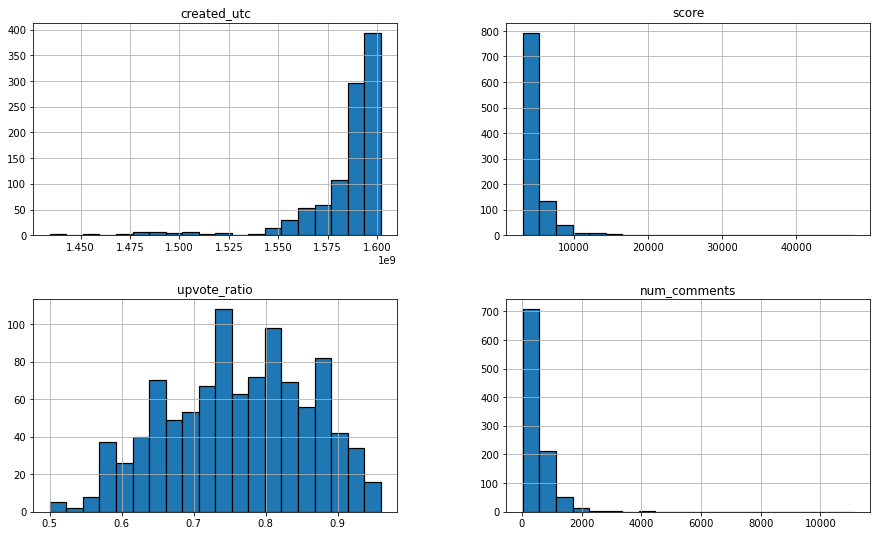

In [9]:
posts.hist(figsize=(15,9), bins=20, edgecolor="black", linewidth=1.2)
plt.show()

# Comments

In [10]:
comment_col_names = ["body", "author", "score", "created_utc", "post_id"]
comments = pd.read_csv("reddit_data/conservative_comments.csv", names=comment_col_names)
comments.head()

,body,author,score,created_utc,post_id
0,'I too love kissing the ass of an authoritaria...,supremegnkdroid,507,1.59e+09,ftaazt
1,'Don’t forget to mention the millions of peopl...,Martian-Prodigy,644,1.59e+09,ftaazt
2,'Why did you post a picture of Winnie the Poo?',Galtifer,549,1.59e+09,ftaazt
3,'As a liberal: fuck China and fuck censorship',Not-2day-Satan,73,1.59e+09,ftaazt
4,'Take this down: https://imgur.com/jhxd93Y ...,NaN,1172,1.59e+09,ftaazt


In [11]:
print(comments.shape)

(441780, 5)


In [12]:
# print(comments.info())

In [13]:
comments.describe()

,score,created_utc
count,441780.00,4.42e+05
mean,12.24,1.59e+09
std,67.52,2.63e+07
min,-543.00,1.43e+09
25%,1.00,1.59e+09
50%,2.00,1.59e+09
75%,6.00,1.60e+09
max,4583.00,1.60e+09


In [14]:
# comments.sort_values(by="score", ascending=False).head(5)

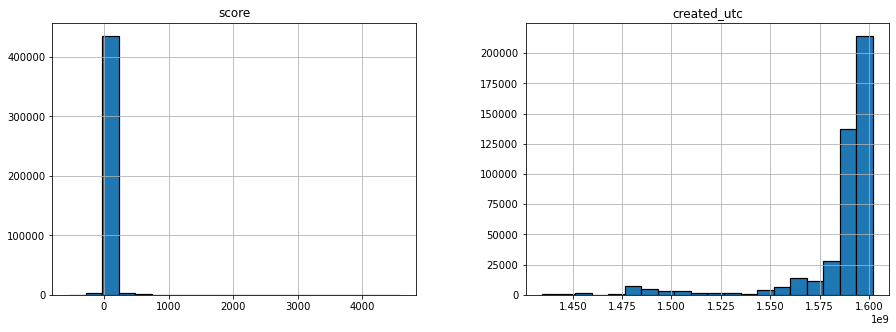

In [15]:
comments.hist(figsize=(15,5), bins=20, edgecolor="black", linewidth=1.2)
plt.show()

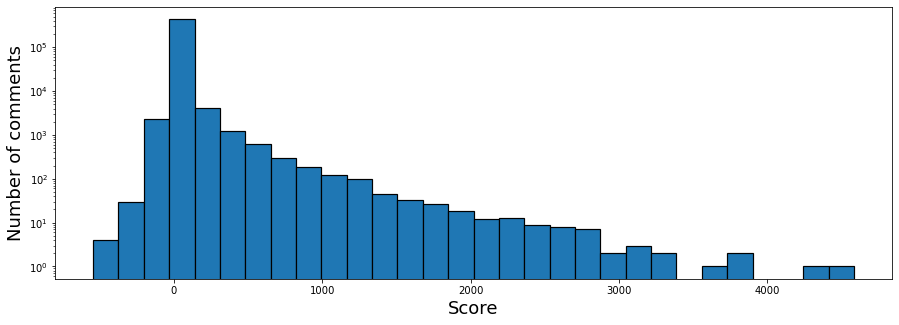

In [16]:
scores = comments["score"]
plt.figure(figsize=(15,5))
plt.hist(scores.values, bins=30, edgecolor="black", linewidth=1.2)
plt.yscale("log")
plt.ylabel("Number of comments", fontsize=18)
plt.xlabel("Score", fontsize=18)
plt.show()

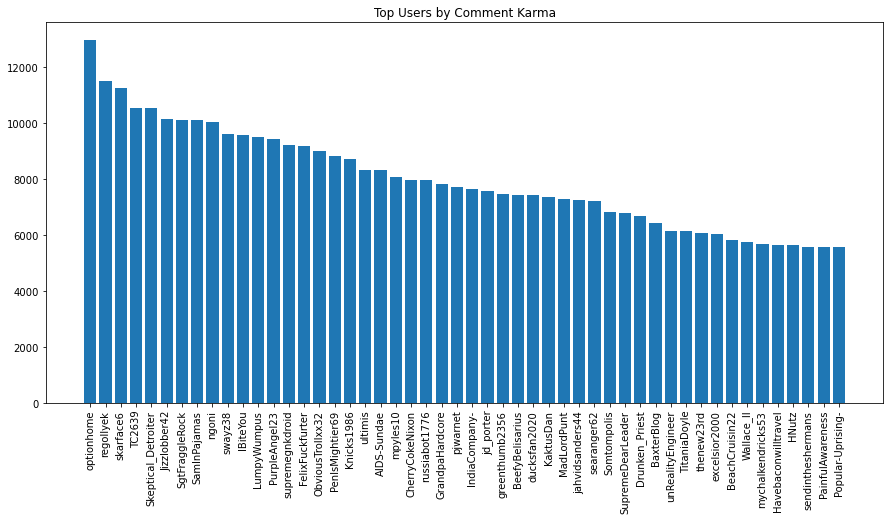

In [17]:
top_users = comments.groupby(["author"])['score'].sum().reset_index().sort_values('score', ascending=False)
users = top_users["author"].values[0:50]
scores = top_users["score"].values[0:50]

plt.figure(figsize=(15,7))
plt.title("Top Users by Comment Karma")
plt.bar(users, scores)
plt.xticks(users, rotation=90)
plt.show()

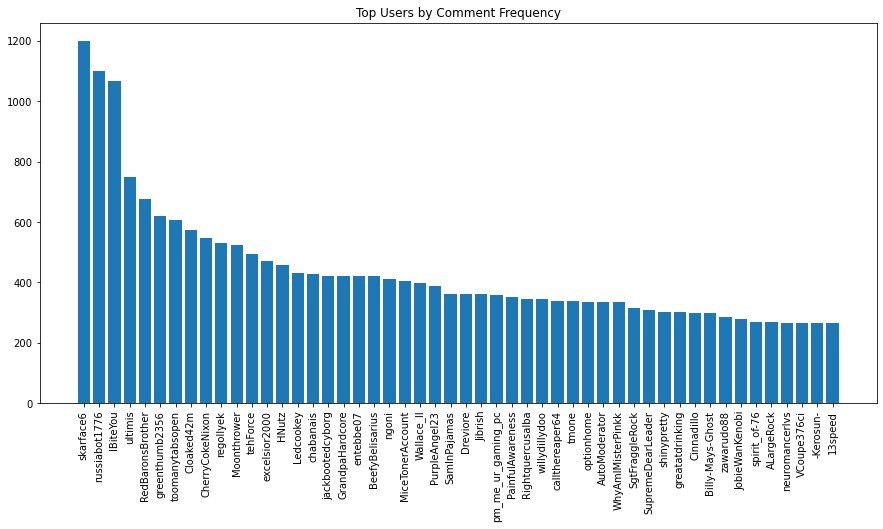

In [18]:
user_comment_counts = comments["author"].value_counts().sort_values(ascending=False)
users = user_comment_counts.index.values[0:50]
scores = user_comment_counts.values[0:50]

plt.figure(figsize=(15,7))
plt.title("Top Users by Comment Frequency")
plt.bar(users, scores)
plt.xticks(users, rotation=90)
plt.show()